## B4.2 Linear Regression

Second modelling was done by using Linear Regression method. It gave different accuracy results when we considered different variables. On visualising it through ploting we found that it didnot give satisfactory prediction of DC Power wrt Ambient Temperature and DC Power wrt Date. Overall it was not predicting satisfactorily so we modelled again with SVM.

In [1]:
#importing all the libraries

import numpy as np # numpy array and performing algebraic operations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualisation and plots
import matplotlib.pyplot as plt #data visualisation and plots

In [2]:
df = pd.read_csv('C:/Users/win/Desktop/FinalCode/dataset/new_data_LR.csv')
df.head()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME,DATE
0,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,0:00:00,15/05/2020
1,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,0:00:00,15/05/2020
2,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0,0:00:00,15/05/2020
3,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0,0:00:00,15/05/2020
4,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0,0:00:00,15/05/2020


In [3]:

df['DATE'] = pd.to_datetime(df.DATE, format='%d/%m/%Y')

In [4]:
df.DATE.dtypes

dtype('<M8[ns]')

In [5]:
# Drop extra features that are not needed. 

#From scientific theory:
#Solar Power generation in dependent on the solar irradiation falling on the plant,
#the DC power generated from the solar plant also affects the solar power generation
#The ambient and module tempertaure also affect the solar power generation

df = df.drop(['AC_POWER','DAILY_YIELD','TOTAL_YIELD','TIME'],axis=1)


In [6]:
from sklearn.preprocessing import scale
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import datetime as dt

Text(0, 0.5, 'DC Power (kW)')

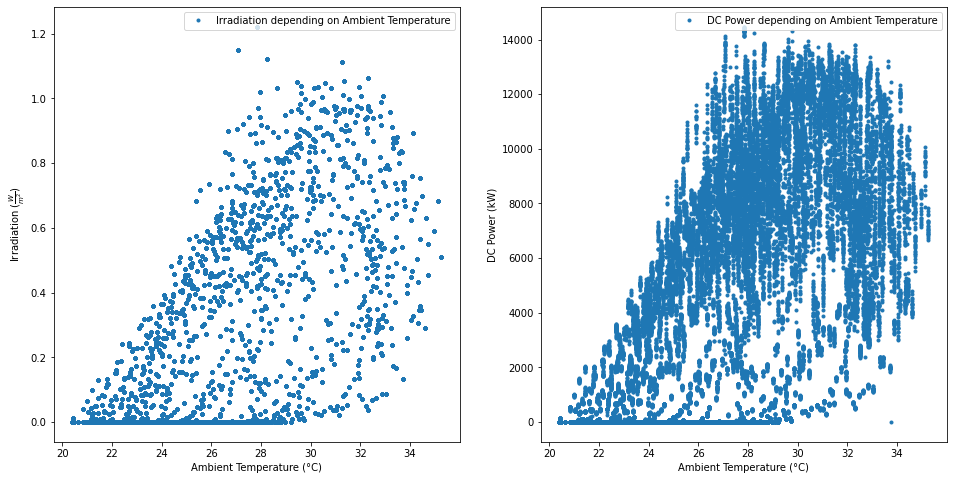

In [7]:
# Create plots of the ambient temperature and irradiation data for visualizing the correlation between the two

fig, axs = plt.subplots(1,2, figsize=(16,8),sharex=True)

df.plot(x="AMBIENT_TEMPERATURE",y="IRRADIATION",style='.',label="Irradiation depending on Ambient Temperature",ax=axs[0])
axs[0].set_xlabel('Ambient Temperature (°C)')
axs[0].set_ylabel(r'Irradiation ($\frac{W}{m^2}$)')


df.plot(x="AMBIENT_TEMPERATURE",y="DC_POWER",style='.',label="DC Power depending on Ambient Temperature",ax=axs[1])
axs[1].set_xlabel('Ambient Temperature (°C)')
axs[1].set_ylabel('DC Power (kW)')


B4.2.1 Linear Regression with Ambient Temperature Data

In [8]:
def ts_split(X,y,test_size=0.25):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [9]:
X = df[["DATE", "AMBIENT_TEMPERATURE","MODULE_TEMPERATURE","IRRADIATION"]]
y = df[["DC_POWER"]]


X['DATE']= X['DATE'].map(dt.datetime.toordinal)

X_train, X_test, y_train, y_test = ts_split(X,y)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.9698557698708008


<ipython-input-9-8b960f76a5bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DATE']= X['DATE'].map(dt.datetime.toordinal)


In [10]:
#Create linear regression models for DC power based on ambient temperature
reg1=LinearRegression().fit(df.AMBIENT_TEMPERATURE.values.reshape(-1,1),df.DC_POWER.values)
reg1

LinearRegression()

In [11]:
# Predict the values based on the inputs
y1_pred =reg1.predict(df.AMBIENT_TEMPERATURE.values.reshape(-1,1))
y1_pred

array([2605.42103173, 2605.42103173, 2605.42103173, ...,  -39.0608137 ,
        -39.0608137 ,  -39.0608137 ])

In [12]:
plot_y = y1_pred.tolist()
#plot_y

 Plot results

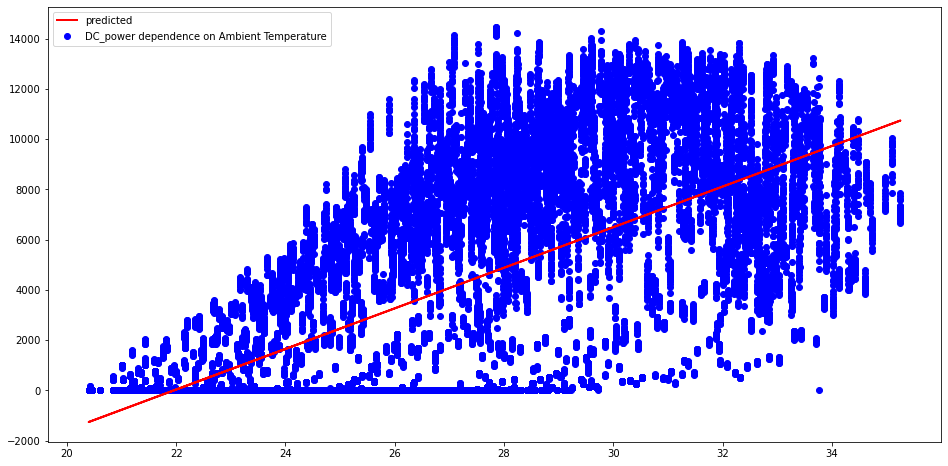

In [13]:
import matplotlib.pyplot as plt
x= df["AMBIENT_TEMPERATURE"]
y= df["DC_POWER"]
y1= plot_y

plt.figure(figsize=(16,8))

plt.scatter(x,y,label='DC_power dependence on Ambient Temperature', color='blue')

plt.plot(x,y1,label='predicted', color='red', linestyle='-', linewidth=2)

plt.legend()
plt.show()

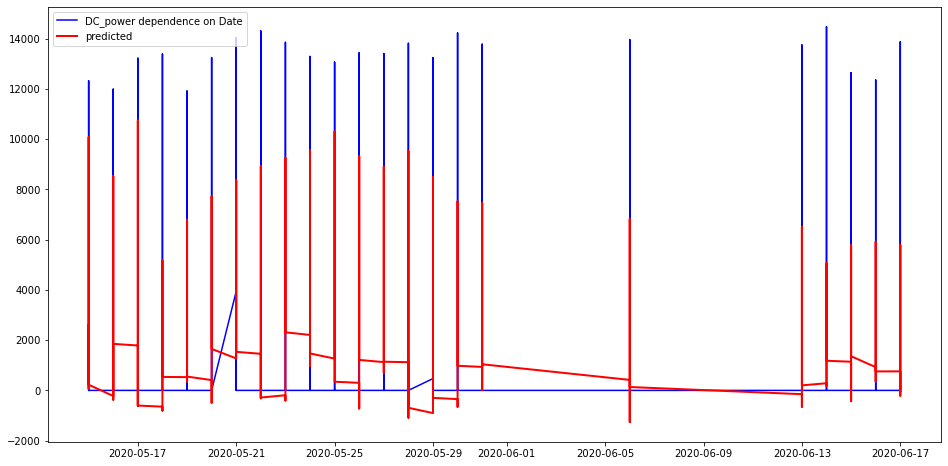

In [14]:
x= df["DATE"]
y= df["DC_POWER"]
y1= plot_y

plt.figure(figsize=(16,8))

plt.plot(x,y,label='DC_power dependence on Date', color='blue')

plt.plot(x,y1,label='predicted', color='red', linestyle='-', linewidth=2)

plt.legend()
plt.show()

In [15]:
#the peaks of the predicted model never seem to reach the peaks of the expected model.
#shown by r square value

print(fr'The R\u00b2 value for Solar Power plant taken here is {r2_score(df.DC_POWER,y1_pred):.3f}')


The R\u00b2 value for Solar Power plant taken here is 0.495


Hence we should search for another model for our data...what about SVM?

## Save the Model

In [16]:
import pickle

In [17]:
filename='LRModel.pkl'

In [19]:
pickle.dump(reg1,open(filename,'wb'))

## Load model from pickle

In [20]:
load_model=pickle.load(open(filename,'rb'))

## References

https://www.kaggle.com/code/rishabh6377/descriptive-analysis-for-solar-power-generation